##Import packages

Here we are using Keras with TensorFlow to develop a convolutional neural network (CNN) to training the classification of CIFAR-10 dataset

In [ ]:
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

#Data Preprocessing

#### Load and Understand the Data
cifar10 dataset is loaded

In [ ]:
data = tf.keras.datasets.cifar10

###Split Data into Training and Test Set

In [ ]:
(x_train, y_train), (x_test, y_test) = data.load_data()
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


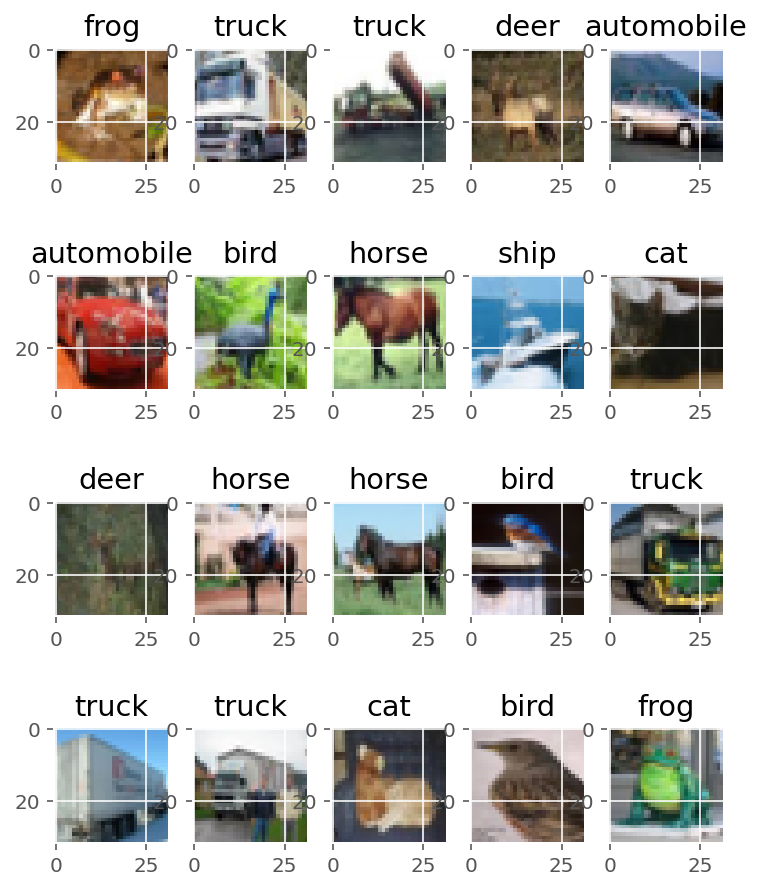

In [ ]:
#Show the images from Dataset with Labels
y_label = {0:'airplane',1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
plt.close('all')
plt.subplots_adjust(top = 2, bottom = 0.1)
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(y_label[y_train[i,0]])
plt.show()

###Initialitzation of hyper parameters

In [ ]:
# Initialitzation of hyper parameters
batch_size = 32
num_classes = 10
epochs = 40

###Mean Subtraction & Normalization

In [ ]:

mean=np.mean(x_train)
std=np.std(x_train)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_test=(x_test-mean)/std
x_train=(x_train-mean)/std
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

## Convert class vectors to binary class matrices
##y_train = keras.utils.to_categorical(y_train, num_classes)
##y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Convert class vectors to binary class matrices

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Creating CNN Model

Three steps to create a CNN

    Convolution
    Non-linearity activation
    Pooling

Repeat Steps 1,2,3 for adding more hidden layers.

    After that make a fully connected network


In [ ]:
# Lenet
input_shape = x_train.shape[1:]
model = tf.keras.Sequential()

# first set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5),
                        strides=(1,1),
                        padding='same', # adds sufficient padding to the input so that the output has same dimension as input
                        input_shape=input_shape,
                        use_bias=True,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='zeros'))

# Exercise : Complete the 3 activation functions
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# second set of CONV => RELU => POOL
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5),
                        padding='valid'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(5,5),
                 padding='valid'))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84))
model.add(tf.keras.layers.Dropout(0.5))

# Classifier
model.add(tf.keras.layers.Dense(num_classes))

# Exercise : Complete the activation function of the classifier
model.add(tf.keras.layers.Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        1216      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        12832     
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0

**bold text**- `conv2d_1` has 16 filters each of dimension 25, plus bias of size 16 for each corresponding filter with 3 channles to give 1216 parameters: (3*(5 * 5 * 16)) + 16 = 1216
- `conv2d_2` has 16 filters each of dimension 25, acting on the 6 channels from the earlier layer plus bias of size 16 for each corresponding filter to give 2416 parameters: (6 *(25 * 16)) + 16 = 2416

#Training Model

In [ ]:
##with Adam Optimizer
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
start = time.time()
model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, # number of samples to be used for each gradient update
                      epochs=epochs, # number of iterations over the entire x_train data#
                      validation_split = 0.1, #validation_data=(x_test, y_test), # on which to evaluate loss and model metrics at the end of each epoch
                     )
end = time.time()
print ('Time taken to run Model : {} seconds'.format(end-start))

Epoch 1/40
1407/1407 [==============================] - 59s 42ms/step - loss: 1.5693 - accuracy: 0.4306 - val_loss: 1.2456 - val_accuracy: 0.5660
Epoch 2/40
1407/1407 [==============================] - 59s 42ms/step - loss: 1.2419 - accuracy: 0.5670 - val_loss: 1.0321 - val_accuracy: 0.6344
Epoch 3/40
1407/1407 [==============================] - 61s 43ms/step - loss: 1.1112 - accuracy: 0.6146 - val_loss: 0.9970 - val_accuracy: 0.6600
Epoch 4/40
1407/1407 [==============================] - 61s 44ms/step - loss: 1.0226 - accuracy: 0.6483 - val_loss: 0.9161 - val_accuracy: 0.6878
Epoch 5/40
1407/1407 [==============================] - 61s 43ms/step - loss: 0.9589 - accuracy: 0.6725 - val_loss: 0.8660 - val_accuracy: 0.6984
Epoch 6/40
1407/1407 [==============================] - 61s 43ms/step - loss: 0.9212 - accuracy: 0.6878 - val_loss: 0.8455 - val_accuracy: 0.7102
Epoch 7/40
1407/1407 [==============================] - 62s 44ms/step - loss: 0.8823 - accuracy: 0.6973 - val_loss: 0.8631 -

In [ ]:
#Save Model
model.save("modelLenet_Adam.h5")

In [ ]:
##model.save("/Users/myatsusuaung/Documents/AI Solutions Development/PRDL/",True,True,None,None,None)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /Users/myatsusuaung/Documents/AI Solutions Development/PRDL/assets


### Plotting out the accuracy and loss


Below we plot out the trend of the accuracy and loss of both the training set and validation set.

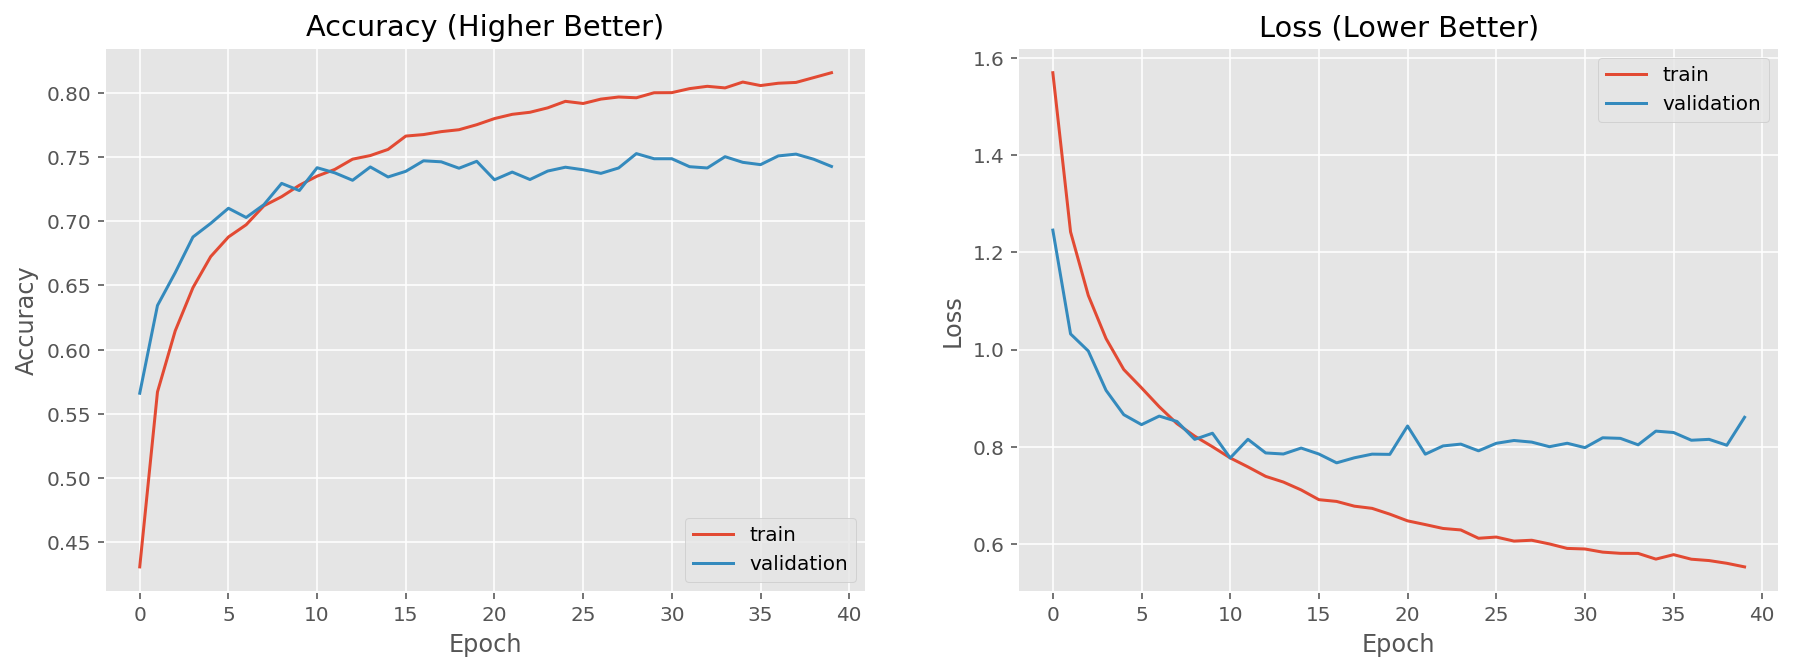

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

In [ ]:
train_loss, train_score = model.evaluate(x_train, y_train)
test_loss, test_score = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.8801 - accuracy: 0.7294


In [ ]:
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)
print("Train Score:", train_score)
print("Test Score:", test_score)

Train Loss: 0.5201622247695923
Test Loss: 0.8800501227378845
Train Score: 0.8404399752616882
Test Score: 0.7293999791145325
